<h1>總整理

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
np.__version__,pd.__version__

('1.17.4', '0.25.3')

In [3]:
# pd.set_option("display.max_rows",None)
# pd.set_option("display.max_columns",None)

##### 讀取資料

In [4]:
# 家
# prev_data = pd.read_csv('previous_application.csv')
# POS_data = pd.read_csv('POS_CASH_balance.csv')
# 學校
prev_data = pd.read_csv('..\\..\\Desktop\\home-credit-default-risk\\previous_application.csv')
POS_data = pd.read_csv('..\\..\\Desktop\\home-credit-default-risk\\POS_CASH_balance.csv')
# 組長
# prev_data = pd.read_csv('../../datasets/homecdt_eda/previous_application.csv')
# POS_data = pd.read_csv('../../datasets/homecdt_eda/POS_CASH_balance.csv')


In [5]:
prev_data

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [6]:
POS_data

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
...,...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0


#### 定義函數

In [5]:
# 空值
def is_null(df):
    miss_value_percent = df.isnull().sum().sort_values(ascending=False)/len(df)
    miss_value_percent = (miss_value_percent * 100).round(decimals=2)

    miss_value_count = df.isnull().sum().sort_values(ascending=False)
    miss_value =pd.DataFrame( {'count':miss_value_count ,'precent': miss_value_percent} )

    print("空值共有 " + str(miss_value_count[miss_value_count>0].count()) + " 個欄位")
    print(miss_value[miss_value_count>0])
    
# 資料型態
def Type(df):
    return pd.DataFrame(df.dtypes).reset_index()

# 分類是空值與零的數
def check_na(df):
    
    data_float64 = list(df.columns[df.dtypes=="float64"])
    data_float64_count = len(data_float64)
    aa = pd.DataFrame()
    for name in data_float64:
        data_is_na = df[df[name].isnull()].count()[0]
        data_is_0 = df[df[name]==0].count()[0]
        pad = pd.DataFrame({"Na":data_is_na,"0":data_is_0},index=[name])
        aa = pd.concat([aa,pad],axis=0)
    return aa


# # Prev時間異常值，另外新增欄位
# issue_data = list(prev_data.columns[31:-1])
# for name in issue_data:    
# #     rename = name + "_ANOM"
# #     data[rename] = data[name] == 365243
#     prev_data[name].replace({365243: np.nan}, inplace = True)


# # Prev將缺失值大於60的欄位去除
# miss_value_percent = prev_data.isnull().sum().sort_values(ascending=False)/len(prev_data)
# miss_value_percent = (miss_value_percent * 100).round(decimals=2)

# if (miss_value_percent>60).any():
#     delect_colomns = list(miss_value_percent[miss_value_percent>60].index)
#     for n in delect_colomns:
#         prev_data = prev_data.drop(columns=n)
        
# # AMT_CREDIT空值只有一個直接補0
# prev_data['AMT_CREDIT'].replace({np.nan: 0}, inplace = True)


In [6]:
is_null(prev_data)

空值共有 16 個欄位
                             count  precent
RATE_INTEREST_PRIVILEGED   1664263    99.64
RATE_INTEREST_PRIMARY      1664263    99.64
RATE_DOWN_PAYMENT           895844    53.64
AMT_DOWN_PAYMENT            895844    53.64
NAME_TYPE_SUITE             820405    49.12
DAYS_TERMINATION            673065    40.30
NFLAG_INSURED_ON_APPROVAL   673065    40.30
DAYS_FIRST_DRAWING          673065    40.30
DAYS_FIRST_DUE              673065    40.30
DAYS_LAST_DUE_1ST_VERSION   673065    40.30
DAYS_LAST_DUE               673065    40.30
AMT_GOODS_PRICE             385515    23.08
AMT_ANNUITY                 372235    22.29
CNT_PAYMENT                 372230    22.29
PRODUCT_COMBINATION            346     0.02
AMT_CREDIT                       1     0.00


In [7]:
is_null(POS_data)

空值共有 2 個欄位
                       count  precent
CNT_INSTALMENT_FUTURE  26087     0.26
CNT_INSTALMENT         26071     0.26


### 特徵工程
---
POS_data
  
   * 新增特徵欄位Delay_rate  --> 遲繳比例 (ex 若有四期 其有一期遲繳超過一天的話就是1/4)
   * 新增特徵欄位Contract_Change --> 提早繳完 且 不在目前進行中的貸款
   * 新增特徵欄位Total_Months --> 總還款期數
   

In [8]:
# 2020-01-16

# Total_Months --> 總還款期數
# MONTHS_BALANCE_start --> 貸款開始時間
# MONTHS_BALANCE_finish --> 貸款結束時間
# CNT_INSTALMENT_max --> 最大申請期數(擬定合約期數)
# CNT_INSTALMENT_min --> 最小申請期數(中間改合約)
# CNT_INSTALMENT_median --> 申請期數中位數
# Delay_Rate --> 遲繳比例(ex 共四期 有一期遲繳就是1/4)
# SK_DPD_max --> 貸款愈期最大天數
# SK_DPD_mean --> 貸款逾期平均數
# Contract_Change -- > 提早繳完 且 不在目前進行中的貸款
# Contract_Change_count --> 合約縮短了多少期
# CNT_INSTALMENT/Total_Months_rate --> 申請期數與總還款期數比例
# Contract_Change_rate(CNT_INSTALMENT) --> 縮短了多少期除以申請期數
# Contract_Change_rate(Total_Months) --> 縮短了多少期除以總還款期數

# 將有特殊狀態的欄位新增 (onehot)
categorical_columns = []
for name in POS_data:
    if POS_data[name].dtype=='object':
        categorical_columns.append(name)
POS_data = pd.get_dummies(POS_data, columns = categorical_columns)

POS_data.rename(columns={'NAME_CONTRACT_STATUS_Active':'Active',
                     'NAME_CONTRACT_STATUS_Amortized debt':'Amortized debt',
                    'NAME_CONTRACT_STATUS_Approved':'Approved',
                    'NAME_CONTRACT_STATUS_Canceled':'Canceled',
                    'NAME_CONTRACT_STATUS_Completed':'Completed',
                    'NAME_CONTRACT_STATUS_Demand':'Demand',
                    'NAME_CONTRACT_STATUS_Returned to the store':'Returned to the store',
                    'NAME_CONTRACT_STATUS_Signed':'Signed',
                    'NAME_CONTRACT_STATUS_XNA':'XNA'},inplace=True)

# 新增欄位

POS_data['Delay']=(POS_data['SK_DPD']>0).replace(True,1) # 該期貸款有愈期，1為有延遲，0為沒延遲
POS_data['SK_DPD_mean']=POS_data['SK_DPD'] # 要算平均
POS_data['CNT_INSTALMENT_min']=POS_data['CNT_INSTALMENT'] # 申請期最小值
POS_data['CNT_INSTALMENT_median']=POS_data['CNT_INSTALMENT'] # 申請期的中位數
POS_data['MONTHS_BALANCE_start']=POS_data['MONTHS_BALANCE'] # 貸款開始時間
POS_data['MONTHS_BALANCE_finish']=POS_data['MONTHS_BALANCE'] # 貸款結束時間


# 創造新的欄位 
num_aggregations = {
        'MONTHS_BALANCE':'count',
        'MONTHS_BALANCE_start':'min',
        'MONTHS_BALANCE_finish':'max', 
        'CNT_INSTALMENT' : 'max',
        'CNT_INSTALMENT_min':'min',
        'CNT_INSTALMENT_median':'median',
        'Delay':'mean',
        'SK_DPD':'max',
        'SK_DPD_mean':'mean',
        'Completed':'max',
        'Active':'sum',
        'Signed':'sum',
        'Demand':'sum',
        'Returned to the store':'sum',
        'Approved':'sum',
        'Amortized debt':'sum',
        'Canceled':'sum',
        'XNA':'sum'
    }

POS_data_1 = POS_data.groupby(['SK_ID_CURR',
                                    'SK_ID_PREV']).agg({**num_aggregations})
# 做更名
POS_data_1.rename(columns={'MONTHS_BALANCE':'Total_Months',
                      'Delay':"Delay_Rate",
                      'SK_DPD':'SK_DPD_max',
                      'CNT_INSTALMENT':'CNT_INSTALMENT_max'},inplace=True)
# 重新排列
POS_data_1.reset_index(level=('SK_ID_CURR',
                          'SK_ID_PREV'),inplace=True)

# 提早繳完 且 不在目前進行中的貸款
POS_data_1['Contract_Change'] = ((POS_data_1['Total_Months'] < POS_data_1 ['CNT_INSTALMENT_max']) & (POS_data_1['Completed'] != 0)).replace(True,1)
# 合約縮短了多少期
POS_data_1['Contract_Change_count'] = POS_data_1['CNT_INSTALMENT_max']-POS_data_1['CNT_INSTALMENT_min']
# 申請期數與總還款期數比例
POS_data_1['CNT_INSTALMENT/Total_Months_rate'] = POS_data_1['CNT_INSTALMENT_max']/POS_data_1['Total_Months']
# 縮短了多少期除以申請期數
POS_data_1['Contract_Change_rate(CNT_INSTALMENT)'] = POS_data_1['Contract_Change_count']/POS_data_1['CNT_INSTALMENT_max']
# 縮短了多少期除以總還款期數
POS_data_1['Contract_Change_rate(Total_Months)'] = POS_data_1['Contract_Change_count']/POS_data_1['Total_Months']
# 狀態發生期數除以總還款期數
POS_data_1['Active'] = POS_data_1['Active']/POS_data_1['Total_Months']
POS_data_1['Signed'] = POS_data_1['Signed']/POS_data_1['Total_Months']
POS_data_1['Demand'] = POS_data_1['Demand']/POS_data_1['Total_Months']
POS_data_1['Returned to the store'] = POS_data_1['Returned to the store']/POS_data_1['Total_Months']
POS_data_1['Approved'] = POS_data_1['Approved']/POS_data_1['Total_Months']
POS_data_1['Amortized debt'] = POS_data_1['Amortized debt']/POS_data_1['Total_Months']
POS_data_1['Canceled'] = POS_data_1['Canceled']/POS_data_1['Total_Months']
POS_data_1['XNA'] = POS_data_1['XNA']/POS_data_1['Total_Months']
# POS_data_1 = POS_data_1.drop(['SK_ID_CURR'],axis=1)

In [9]:
pd.set_option("display.max_columns",None)
POS_data_1.head(20)

,SK_ID_CURR,SK_ID_PREV,Total_Months,MONTHS_BALANCE_start,MONTHS_BALANCE_finish,CNT_INSTALMENT_max,CNT_INSTALMENT_min,CNT_INSTALMENT_median,Delay_Rate,SK_DPD_max,SK_DPD_mean,Completed,Active,Signed,Demand,Returned to the store,Approved,Amortized debt,Canceled,XNA,Contract_Change,Contract_Change_count,CNT_INSTALMENT/Total_Months_rate,Contract_Change_rate(CNT_INSTALMENT),Contract_Change_rate(Total_Months)
0,100001,1369693,5,-57,-53,4.0,4.0,4.0,0.000000,0,0.000000,1,0.800000,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.800000,0.000000,0.000000
1,100001,1851984,4,-96,-93,4.0,4.0,4.0,0.250000,7,1.750000,1,0.750000,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000
2,100002,1038818,19,-19,-1,24.0,24.0,24.0,0.000000,0,0.000000,0,1.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1.263158,0.000000,0.000000
3,100003,1810518,8,-25,-18,12.0,7.0,12.0,0.000000,0,0.000000,1,0.875000,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,1.0,5.0,1.500000,0.416667,0.625000
4,100003,2396755,12,-77,-66,12.0,12.0,12.0,0.000000,0,0.000000,0,1.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000
5,100003,2636178,8,-28,-21,6.0,6.0,6.0,0.000000,0,0.000000,1,0.875000,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.750000,0.000000,0.000000
6,100004,1564014,4,-27,-24,4.0,3.0,4.0,0.000000,0,0.000000,1,0.750000,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.250000,0.250000
7,100005,2495675,11,-25,-15,12.0,9.0,12.0,0.000000,0,0.000000,1,0.818182,0.090909,0.0,0.000,0.0,0.0,0.0,0.0,1.0,3.0,1.090909,0.250000,0.272727
8,100006,2078043,3,-6,-4,48.0,1.0,1.0,0.000000,0,0.000000,1,0.666667,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,1.0,47.0,16.000000,0.979167,15.666667
9,100006,2190416,10,-10,-1,12.0,12.0,12.0,0.000000,0,0.000000,0,1.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1.200000,0.000000,0.000000


prev_data
  
   * 新增特徵欄位Early_ter --> 有繳過貸款但提前解約

In [ ]:
# prev_data

# # 提前解約(有問題?或是繳完了?)
# prev_data['Early_ter'] = (prev_data['DAYS_LAST_DUE_1ST_VERSION']>prev_data['DAYS_LAST_DUE']).replace(True,1) # 有繳過貸款但提前解約

# # AMT_CREDIT(需還款總額度)/AMT_APPLICATION(實際得到的錢)
# prev_data['CREDIT_APPLICATION_rate'] = prev_data['AMT_CREDIT'] / prev_data['AMT_APPLICATION']

# # 還款率 --> AMT_ANNUITY(每期還款額度)/AMT_CREDIT(需還款總額度)
# prev_data['PAYMENT_rate'] = prev_data['AMT_ANNUITY'] / prev_data['AMT_CREDIT']

<h1>將POS_CASH_balance.csv併到previous_application.csv

In [ ]:
# result = pd.merge(prev_data, POS_data_1,how='outer')

<h1> 將POS_CASH_balance.csv和installments_payments.csv併到previous_application.csv

In [10]:
# 同整installments_payments、POS_CASH_balance、credit_card_balance

prev_comb_data = pd.read_csv('..\\..\\Desktop\\home-credit-default-risk\\previous_application_w_installment.csv')

result = pd.merge(prev_comb_data, POS_data_1,how='outer')
# result.to_csv('..\\..\\Desktop\\home-credit-default-risk\\previous_application_w_installment_w_POS.csv')


# 家裡
# prev_comb_data = pd.read_csv('previous_application_w_installment.csv')

# result = pd.merge(prev_comb_data, POS_data_1,how='outer')
# result.to_csv('previous_application_w_installment_w_POS.csv')


c:\program files\python37\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (2,8,10,15,16,18,19,20,21,22,23,24,25,27,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
result.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,NUM_INSTALMENT_NUMBER_GROUP_MAX,NUM_INSTALMENT_NUMBER_GROUP_MIN,DAYS_ENTRY_PAYMENT_MAX,DAYS_ENTRY_PAYMENT_MIN,DAYS_ENTRY_DIFF_MAX,DAYS_ENTRY_DIFF_MEAN,AMT_PAYMENT_MEDIAN,AMT_PAYMENT_MAX,DELAY_SUM,DELAY%,AMT_INSTALMENT_ALL,AMT_PAYMENT_ALL,1_DELAY%,1_DAYS_ENTRY_DIFF_MAX,3_DELAY%,3_DAYS_ENTRY_DIFF_MAX,3_DAYS_ENTRY_DIFF_MEAN,6_DELAY%,6_DAYS_ENTRY_DIFF_MAX,6_DAYS_ENTRY_DIFF_MEAN,9_DELAY%,9_DAYS_ENTRY_DIFF_MAX,9_DAYS_ENTRY_DIFF_MEAN,-1_DELAY%,-1_DAYS_ENTRY_DIFF_MAX,-3_DELAY%,-3_DAYS_ENTRY_DIFF_MAX,-3_DAYS_ENTRY_DIFF_MEAN,-6_DELAY%,-6_DAYS_ENTRY_DIFF_MAX,-6_DAYS_ENTRY_DIFF_MEAN,-9_DELAY%,-9_DAYS_ENTRY_DIFF_MAX,-9_DAYS_ENTRY_DIFF_MEAN,FINISHED,OUTSTANDING,Total_Months,MONTHS_BALANCE_start,MONTHS_BALANCE_finish,CNT_INSTALMENT_max,CNT_INSTALMENT_min,CNT_INSTALMENT_median,Delay_Rate,SK_DPD_max,SK_DPD_mean,Completed,Active,Signed,Demand,Returned to the store,Approved,Amortized debt,Canceled,XNA,Contract_Change,Contract_Change_count,CNT_INSTALMENT/Total_Months_rate,Contract_Change_rate(CNT_INSTALMENT),Contract_Change_rate(Total_Months)
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15.0,Y,1.0,0.0,0.182832,0.867336,XAP,Approved,-73.0,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35.0,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,1.0,1.0,-42.0,-42.0,0.0,0.000000,17284.275,17284.275,0.0,0.000000,17284.275,17284.275,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.0,0.0,2.0,-2.0,-1.0,12.0,1.0,6.5,0.0,0.0,0.0,1.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.0,6.0,0.916667,5.500000
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-164.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1.0,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,5.0,1.0,-24.0,-144.0,-7.0,-9.200000,25188.615,25188.615,0.0,0.000000,125943.075,125943.075,0.0,-10.0,0.0,-7.0,-8.333333,0.0,-7.0,-9.200000,0.000000,-7.0,-9.200000,0.0,-10.0,0.000000,-8.0,-9.666667,0.000000,-7.0,-9.200000,0.000000,-7.0,-9.200000,1.0,0.0,5.0,-6.0,-2.0,36.0,36.0,36.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.2,0.000000,0.000000
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-301.0,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0,9.0,1.0,-30.0,-283.0,1.0,-8.222222,15060.735,15060.735,1.0,0.111111,135546.615,135546.615,0.0,-12.0,0.0,-8.0,-10.333333,0.0,-8.0,-10.000000,0.111111,1.0,-8.222222,1.0,1.0,0.333333,1.0,-4.666667,0.166667,1.0,-7.166667,0.111111,1.0,-8.222222,1.0,0.0,10.0,-10.0,-1.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.2,0.000000,0.000000
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-512.0,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0,11.0,1.0,-197.0,-484.0,0.0,-7.090909,47041.335,92720.025,0.0,0.000000,563133.375,5

<h1>異常值處理

In [12]:
# Prev時間異常值，另外新增欄位

result_test = result
issue_data = ['DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION']
for name in issue_data:    
#     rename = name + "_ANOM"
#     data[rename] = data[name] == 365243
    result_test[name].replace({365243: np.nan}, inplace = True)
    
# SELLERPLACE_AREA 分行資料有接近一半是-1值，而其他皆為正整數，懷疑是未知
result_test['SELLERPLACE_AREA'].replace({-1: np.nan}, inplace = True)


# Prev將缺失值大於60的欄位去除
miss_value_percent = result_test.isnull().sum().sort_values(ascending=False)/len(result_test)
miss_value_percent = (miss_value_percent * 100).round(decimals=2)

if (miss_value_percent>60).any():
    delect_colomns = list(miss_value_percent[miss_value_percent>60].index)
    for n in delect_colomns:
        result_test = result_test.drop(columns=n)
        
# AMT_CREDIT空值只有一個直接補0
result_test['AMT_CREDIT'].replace({np.nan: 0}, inplace = True)

print(f'刪了欄位 {delect_colomns} ')

刪了欄位 ['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY', 'DAYS_FIRST_DRAWING'] 


In [13]:
is_null(result_test)

空值共有 90 個欄位
                       count  precent
DAYS_TERMINATION      946600    55.10
RATE_DOWN_PAYMENT     943466    54.92
AMT_DOWN_PAYMENT      943466    54.92
DAYS_LAST_DUE         931908    54.25
NAME_TYPE_SUITE       868027    50.53
...                      ...      ...
NAME_PORTFOLIO         47622     2.77
NAME_PRODUCT_TYPE      47622     2.77
CHANNEL_TYPE           47622     2.77
NAME_SELLER_INDUSTRY   47622     2.77
NAME_YIELD_GROUP       47622     2.77

[90 rows x 2 columns]


In [14]:
print(f'previous_application.csv有 - {prev_data.shape[0]} 列 ， {prev_data.shape[1]} 個欄位 ')
print(f'POS_CASH_balance.csv有     - {POS_data_1.shape[0]} 列 ， {POS_data_1.shape[1]} 個欄位 ')
print(f'三個檔案合併後有            -  {result_test.shape[0]} 列 ， {result_test.shape[1]} 個欄位 ')

previous_application.csv有 - 1670214 列 ， 37 個欄位 
POS_CASH_balance.csv有     - 936325 列 ， 25 個欄位 
三個檔案合併後有            -  1717836 列 ， 93 個欄位 


In [62]:
pd.set_option("display.max_columns",None)
result_test = result_test.sort_values(by=['SK_ID_CURR','SK_ID_PREV'])
result_test.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,NUM_INSTALMENT_NUMBER_GROUP_MAX,NUM_INSTALMENT_NUMBER_GROUP_MIN,DAYS_ENTRY_PAYMENT_MAX,DAYS_ENTRY_PAYMENT_MIN,DAYS_ENTRY_DIFF_MAX,DAYS_ENTRY_DIFF_MEAN,AMT_PAYMENT_MEDIAN,AMT_PAYMENT_MAX,DELAY_SUM,DELAY%,AMT_INSTALMENT_ALL,AMT_PAYMENT_ALL,1_DELAY%,1_DAYS_ENTRY_DIFF_MAX,3_DELAY%,3_DAYS_ENTRY_DIFF_MAX,3_DAYS_ENTRY_DIFF_MEAN,6_DELAY%,6_DAYS_ENTRY_DIFF_MAX,6_DAYS_ENTRY_DIFF_MEAN,9_DELAY%,9_DAYS_ENTRY_DIFF_MAX,9_DAYS_ENTRY_DIFF_MEAN,-1_DELAY%,-1_DAYS_ENTRY_DIFF_MAX,-3_DELAY%,-3_DAYS_ENTRY_DIFF_MAX,-3_DAYS_ENTRY_DIFF_MEAN,-6_DELAY%,-6_DAYS_ENTRY_DIFF_MAX,-6_DAYS_ENTRY_DIFF_MEAN,-9_DELAY%,-9_DAYS_ENTRY_DIFF_MAX,-9_DAYS_ENTRY_DIFF_MEAN,FINISHED,OUTSTANDING,Total_Months,MONTHS_BALANCE_start,MONTHS_BALANCE_finish,CNT_INSTALMENT_max,CNT_INSTALMENT_min,CNT_INSTALMENT_median,Delay_Rate,SK_DPD_max,SK_DPD_mean,Completed,Active,Signed,Demand,Returned to the store,Approved,Amortized debt,Canceled,XNA,Contract_Change,Contract_Change_count,CNT_INSTALMENT/Total_Months_rate,Contract_Change_rate(CNT_INSTALMENT),Contract_Change_rate(Total_Months)
201668,1369693,100001,Consumer loans,3951.000,24835.5,23787.0,2520.0,24835.5,FRIDAY,13.0,Y,1.0,0.104326,XAP,Approved,-1740.0,Cash through the bank,XAP,Family,Refreshed,Mobile,POS,XNA,Country-wide,23.0,Connectivity,8.0,high,POS mobile with interest,-1709.0,-1499.0,-1619.0,-1612.0,0.0,4.0,1.0,-1628.0,-1715.0,-6.0,-15.500000,3951.000,17397.900,0.0,0.000000,29250.900,29250.900,0.0,-6.0,0.000000,-6.0,-17.666667,0.000000,-6.0,-15.500000,0.000000,-6.0,-15.500000,0.0,-9.0,0.000000,-9.0,-18.666667,0.000000,-6.0,-15.500000,0.000000,-6.0,-15.500000,1.0,0.0,5.0,-57.0,-53.0,4.0,4.0,4.0,0.00,0.0,0.00,1.0,0.800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.800000,0.000000,0.000
1670214,1851984,100001,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,-2856.0,-2916.0,11.0,3.666667,3982.050,3982.050,1.0,0.333333,11945.025,11945.025,0.0,NaN,0.333333,11.0,5.500000,0.166667,11.0,3.666667,0.111111,11.0,3.666667,0.0,0.0,0.333333,11.0,3.666667,0.166667,11.0,3.666667,0.111111,11.0,3.666667,1.0,0.0,4.0,-96.0,-93.0,4.0,4.0,4.0,0.25,7.0,1.75,1.0,0.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000
892077,1038818,100002,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,XAP,Approved,-606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,-565.0,125.0,-25.0,-17.0,0.0,19.0,1.0,-49.0,-587.0,-12.0,-20.421053,9251.775,53093.745,0.0,0.000000,219625.695,219625.695,0.0,-22.0,0.000000,-22.0,-24.333333,0.000000,-22.0,-25.000000,0.000000,-19.0,-24.000000,0.0,-24.0,0.000000,-12.0,-16.666667,0.000000,-12.0,-17.000000,0.000000,-12.0,-17.222222,1.0,0.0,19.0,-19.0,-1.0,24.0,24.0,24.0,0.00,0.0,0.00,0.0,1.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.263158,0.000000,0.000
575941,1810518,100003,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12.0,Y,1.0,NaN,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,-716.0,-386.0,-536.0,-527.0,1.0,7.0,1.0,-544.0,-719.0,-3.0,-4.428571,98356.995,560835.360,0.0,0.000000,1150977.330,1150977.330,0.0,-3.0,0.000000,-3.0,-4.000000,0.000000,-3.0,-3.833333,0.000000,-3.0,-4.428571,0.0,-8.0,0.000000,-4.0,-5.333333,0.000000,-3.0,-4.666667,0.000000,-3.0,-4.428571,1.0,

In [63]:
check_status = result_test.groupby(['NAME_CONTRACT_STATUS','NAME_CONTRACT_TYPE'])
check_status.first()

SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  \
NAME_CONTRACT_STATUS NAME_CONTRACT_TYPE                                        
Approved             Cash loans             1810518      100003    98356.995   
                     Consumer loans         1369693      100001     3951.000   
                     Revolving loans        1489396      100006    13500.000   
Canceled             Cash loans             1857999      100005    24463.710   
                     Consumer loans         2778996      100067     9323.280   
                     Revolving loans        2827850      100006    36000.000   
                     XNA                    1814539      100523          NaN   
Refused              Cash loans             1697039      100006    32696.100   
                     Consumer loans         1265862      100030     2826.450   
                     Revolving loans        2667797      100053    29250.000   
                     XNA                    1018815      103715          NaN   
Unused offer         Cash loans             2615430      100607          NaN   
                     Consumer loans         1371941      100028     8721.585   
                     Revolving loans        2393686      132962    10125.000   

                                         AMT_APPLICATION  AMT_CREDIT  \
NAME_CONTRACT_STATUS NAME_CONTRACT_TYPE                                
Approved             Cash loans                 900000.0   1035882.0   
                     Consumer loans              24835.5     23787.0   
                     Revolving loans            270000.0    270000.0   
Canceled             Cash loans                      0.0         0.0   
                     Consumer loans                  0.0         0.0   
                     Revolving loans                 0.0         0.0   
                     XNA                             0.0         0.0   
Refused              Cash loans                 688500.0    906615.0   
                     Consumer loans              33660.0     30294.0   
                     Revolving loans                 0.0    585000.0   
                     XNA                             0.0         0.0   
Unused offer         Cash loans                      0.0         0.0   
                     Consumer loans              49315.5     49315.5   
                     Revolving loans                 0.0    202500.0   

                                         AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
NAME_CONTRACT_STATUS NAME_CONTRACT_TYPE                                      
Approved             Cash loans                       0.0         900000.0   
                     Consumer loans                2520.0          24835.5   
                     Revolving loans              21150.0         270000.0   
Canceled             Cash loans                       0.0         454500.0   
                     Consumer loans                   0.0          67486.5   
                     Revolving loans                  0.0         720000.0   
                     XNA                              NaN              NaN   
Refused              Cash loans                       0.0         688500.0   
                     Consumer loans                3366.0          33660.0   
                     Revolving loans                  0.0          90000.0   
                     XNA                              NaN              NaN   
Unused offer         Cash loans                       0.0              0.0   
                     Consumer loans                   0.0          49315.5   
                     Revolving loans                  NaN              NaN   

                                        WEEKDAY_APPR_PROCESS_START  \
NAME_CONTRACT_STATUS NAME_CONTRACT_TYPE                              
Approved             Cash loans                             FRIDAY   
                     Consumer loans                         FRIDAY   
                     Revolving loans                      THURSDAY   
Canceled

<h1> 特徵工程

In [25]:
result_test.head(100)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,NUM_INSTALMENT_NUMBER_GROUP_MAX,NUM_INSTALMENT_NUMBER_GROUP_MIN,DAYS_ENTRY_PAYMENT_MAX,DAYS_ENTRY_PAYMENT_MIN,DAYS_ENTRY_DIFF_MAX,DAYS_ENTRY_DIFF_MEAN,AMT_PAYMENT_MEDIAN,AMT_PAYMENT_MAX,DELAY_SUM,DELAY%,AMT_INSTALMENT_ALL,AMT_PAYMENT_ALL,1_DELAY%,1_DAYS_ENTRY_DIFF_MAX,3_DELAY%,3_DAYS_ENTRY_DIFF_MAX,3_DAYS_ENTRY_DIFF_MEAN,6_DELAY%,6_DAYS_ENTRY_DIFF_MAX,6_DAYS_ENTRY_DIFF_MEAN,9_DELAY%,9_DAYS_ENTRY_DIFF_MAX,9_DAYS_ENTRY_DIFF_MEAN,-1_DELAY%,-1_DAYS_ENTRY_DIFF_MAX,-3_DELAY%,-3_DAYS_ENTRY_DIFF_MAX,-3_DAYS_ENTRY_DIFF_MEAN,-6_DELAY%,-6_DAYS_ENTRY_DIFF_MAX,-6_DAYS_ENTRY_DIFF_MEAN,-9_DELAY%,-9_DAYS_ENTRY_DIFF_MAX,-9_DAYS_ENTRY_DIFF_MEAN,FINISHED,OUTSTANDING,Total_Months,MONTHS_BALANCE_start,MONTHS_BALANCE_finish,CNT_INSTALMENT_max,CNT_INSTALMENT_min,CNT_INSTALMENT_median,Delay_Rate,SK_DPD_max,SK_DPD_mean,Completed,Active,Signed,Demand,Returned to the store,Approved,Amortized debt,Canceled,XNA,Contract_Change,Contract_Change_count,CNT_INSTALMENT/Total_Months_rate,Contract_Change_rate(CNT_INSTALMENT),Contract_Change_rate(Total_Months)
201668,1369693,100001,Consumer loans,3951.000,24835.5,23787.0,2520.0,24835.5,FRIDAY,13.0,Y,1.0,0.104326,XAP,Approved,-1740.0,Cash through the bank,XAP,Family,Refreshed,Mobile,POS,XNA,Country-wide,23.0,Connectivity,8.0,high,POS mobile with interest,-1709.0,-1499.0,-1619.0,-1612.0,0.0,4.0,1.0,-1628.0,-1715.0,-6.0,-15.500000,3951.0000,17397.900,0.0,0.000000,29250.900,29250.900,0.0,-6.0,0.000000,-6.0,-17.666667,0.000000,-6.0,-15.500000,0.000000,-6.0,-15.500000,0.0,-9.0,0.000000,-9.0,-18.666667,0.000000,-6.0,-15.500000,0.000000,-6.0,-15.500000,1.0,0.0,5.0,-57.0,-53.0,4.0,4.0,4.0,0.00,0.0,0.00,1.0,0.800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.800000,0.000000,0.000000
1670214,1851984,100001,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,-2856.0,-2916.0,11.0,3.666667,3982.0500,3982.050,1.0,0.333333,11945.025,11945.025,0.0,NaN,0.333333,11.0,5.500000,0.166667,11.0,3.666667,0.111111,11.0,3.666667,0.0,0.0,0.333333,11.0,3.666667,0.166667,11.0,3.666667,0.111111,11.0,3.666667,1.0,0.0,4.0,-96.0,-93.0,4.0,4.0,4.0,0.25,7.0,1.75,1.0,0.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000
892077,1038818,100002,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,XAP,Approved,-606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,-565.0,125.0,-25.0,-17.0,0.0,19.0,1.0,-49.0,-587.0,-12.0,-20.421053,9251.7750,53093.745,0.0,0.000000,219625.695,219625.695,0.0,-22.0,0.000000,-22.0,-24.333333,0.000000,-22.0,-25.000000,0.000000,-19.0,-24.000000,0.0,-24.0,0.000000,-12.0,-16.666667,0.000000,-12.0,-17.000000,0.000000,-12.0,-17.222222,1.0,0.0,19.0,-19.0,-1.0,24.0,24.0,24.0,0.00,0.0,0.00,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.263158,0.000000,0.000000
575941,1810518,100003,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12.0,Y,1.0,NaN,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,-716.0,-386.0,-536.0,-527.0,1.0,7.0,1.0,-544.0,-719.0,-3.0,-4.428571,98356.9950,560835.360,0.0,0.000000,1150977.330,1150977.330,0.0,-3.0,0.000000,-3.0,-4.000000,0.000000,-3.0,-3.833333,0.000000,-3.0,-4.428571,0.0,-8.0,0.000000,-4.0,-5.333333,0.000000,-3.0,-4.666667,0.0000

In [30]:
# 新增欄位

test = result_test.copy() # 先新建一個df

test['ANNUITY/CREDIT'] = test['AMT_ANNUITY'] / test['AMT_CREDIT']
test['DOWN_PAYMENT/ANNUITY'] = test['AMT_DOWN_PAYMENT'] / test['AMT_ANNUITY']
test['DOWN_PAYMENT/CREDIT'] = test['AMT_DOWN_PAYMENT'] / test['AMT_CREDIT']
test['DOWN_PAYMENT/ANNUITY'] = test['AMT_DOWN_PAYMENT'] / test['AMT_ANNUITY']
test['GOODS_PRICE/CREDIT'] = test['AMT_GOODS_PRICE'] / test['AMT_CREDIT']
test['APPLICATION/CREDIT'] = test['AMT_APPLICATION'] / test['AMT_CREDIT']
test['APPLICATION/GOODS_PRICE'] = test['AMT_APPLICATION'] / test['AMT_GOODS_PRICE']
test['DAYS_LAST_DUE-DAYS_TERMINATION'] = test['DAYS_LAST_DUE'] - test['DAYS_TERMINATION']

In [31]:
# 將有特殊狀態的欄位新增 (onehot)

onehot_list = ['NAME_CONTRACT_STATUS',
'NAME_TYPE_SUITE',
'CODE_REJECT_REASON',
'NAME_PAYMENT_TYPE',
'NAME_PRODUCT_TYPE',
'NFLAG_INSURED_ON_APPROVAL',
'PRODUCT_COMBINATION',
'NAME_SELLER_INDUSTRY',
'NAME_YIELD_GROUP']

test = pd.get_dummies(test, columns = onehot_list , dummy_na=True)

In [32]:
# 將有特殊狀態的欄位新增 (onehot) **********全部的object*********

# test = result_test.copy()

# categorical_columns = []
# for name in test:
#     if test[name].dtype=='object':
#         categorical_columns.append(name)
# test = pd.get_dummies(test, columns = categorical_columns , dummy_na=True)
# dummy_na=True --> 也會將是空值得特別標記出來，因為 merge 時是用 outer 所以有些資料在第二層的欄位是沒有值得 ， 在onehot時會顯示不出來

In [33]:
pd.set_option("display.max_rows",None)
test.head(20)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,DAYS_DECISION,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NUM_INSTALMENT_NUMBER_GROUP_MAX,NUM_INSTALMENT_NUMBER_GROUP_MIN,DAYS_ENTRY_PAYMENT_MAX,DAYS_ENTRY_PAYMENT_MIN,DAYS_ENTRY_DIFF_MAX,DAYS_ENTRY_DIFF_MEAN,AMT_PAYMENT_MEDIAN,AMT_PAYMENT_MAX,DELAY_SUM,DELAY%,AMT_INSTALMENT_ALL,AMT_PAYMENT_ALL,1_DELAY%,1_DAYS_ENTRY_DIFF_MAX,3_DELAY%,3_DAYS_ENTRY_DIFF_MAX,3_DAYS_ENTRY_DIFF_MEAN,6_DELAY%,6_DAYS_ENTRY_DIFF_MAX,6_DAYS_ENTRY_DIFF_MEAN,9_DELAY%,9_DAYS_ENTRY_DIFF_MAX,9_DAYS_ENTRY_DIFF_MEAN,-1_DELAY%,-1_DAYS_ENTRY_DIFF_MAX,-3_DELAY%,-3_DAYS_ENTRY_DIFF_MAX,-3_DAYS_ENTRY_DIFF_MEAN,-6_DELAY%,-6_DAYS_ENTRY_DIFF_MAX,-6_DAYS_ENTRY_DIFF_MEAN,-9_DELAY%,-9_DAYS_ENTRY_DIFF_MAX,-9_DAYS_ENTRY_DIFF_MEAN,FINISHED,OUTSTANDING,Total_Months,MONTHS_BALANCE_start,MONTHS_BALANCE_finish,CNT_INSTALMENT_max,CNT_INSTALMENT_min,CNT_INSTALMENT_median,Delay_Rate,SK_DPD_max,SK_DPD_mean,Completed,Active,Signed,Demand,Returned to the store,Approved,Amortized debt,Canceled,XNA,Contract_Change,Contract_Change_count,CNT_INSTALMENT/Total_Months_rate,Contract_Change_rate(CNT_INSTALMENT),Contract_Change_rate(Total_Months),ANNUITY/CREDIT,DOWN_PAYMENT/ANNUITY,DOWN_PAYMENT/CREDIT,GOODS_PRICE/CREDIT,APPLICATION/CREDIT,APPLICATION/GOODS_PRICE,DAYS_LAST_DUE-DAYS_TERMINATION,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Unused offer,NAME_CONTRACT_STATUS_nan,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_nan,CODE_REJECT_REASON_CLIENT,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_LIMIT,CODE_REJECT_REASON_SCO,CODE_REJECT_REASON_SCOFR,CODE_REJECT_REASON_SYSTEM,CODE_REJECT_REASON_VERIF,CODE_REJECT_REASON_XAP,CODE_REJECT_REASON_XNA,CODE_REJECT_REASON_nan,NAME_PAYMENT_TYPE_Cash through the bank,NAME_PAYMENT_TYPE_Cashless from the account of the employer,NAME_PAYMENT_TYPE_Non-cash from your account,NAME_PAYMENT_TYPE_XNA,NAME_PAYMENT_TYPE_nan,NAME_PRODUCT_TYPE_XNA,NAME_PRODUCT_TYPE_walk-in,NAME_PRODUCT_TYPE_x-sell,NAME_PRODUCT_TYPE_nan,NFLAG_INSURED_ON_APPROVAL_0.0,NFLAG_INSURED_ON_APPROVAL_1.0,NFLAG_INSURED_ON_APPROVAL_nan,PRODUCT_COMBINATION_Card Street,PRODUCT_COMBINATION_Card X-Sell,PRODUCT_COMBINATION_Cash,PRODUCT_COMBINATION_Cash Street: high,PRODUCT_COMBINATION_Cash Street: low,PRODUCT_COMBINATION_Cash Street: middle,PRODUCT_COMBINATION_Cash X-Sell: high,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest,PRODUCT_COMBINATION_nan,NAME_SELLER_INDUSTRY_Auto technology,NAME_SELLER_INDUSTRY_Clothing,NAME_SELLER_INDUSTRY_Connectivity,NAME_SELLER_INDUSTRY_Construction,NAME_SELLER_INDUSTRY_Consumer electronics,NAME_SELLER_INDUSTRY_Furniture,NAME_SELLER_INDUSTRY_Industry,NAME_SELLER_INDUSTRY_Jewelry,NAME_SELLER_INDUSTRY_MLM partners,NAME_SELLER_INDUSTRY_Tourism,NAME_SELLER_INDUSTRY_XNA,NAME_SELLER_INDUSTRY_nan,NAME_YIELD_GROUP_XNA,NAME_YIELD_GROUP_high,NAME_YIELD_GROUP_low_action,NAME_YIELD_GROUP_low_normal,NAME_YIELD_GROUP_middle,NAME_YIELD_GROUP_nan
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15.0,Y,1.0,0.000000,XAP,-73.0,Repeater,Mobile,POS,Country-wide,35.0,12.0,-

In [34]:
# 針對previous_application 新增的欄位做計算

test1=test.copy()

# 把float64拿出來作為欄位要處理的鍵值對  ex: 'AMT_ANNUITY': ['sum', 'max', 'min', 'mean'] ,  ......'
new_feature = [
              'AMT_ANNUITY',
              'AMT_APPLICATION',
              'AMT_CREDIT',
              'AMT_DOWN_PAYMENT',
              'AMT_GOODS_PRICE',
              'DAYS_LAST_DUE',
              'DAYS_TERMINATION',
              'ANNUITY/CREDIT',
              'DOWN_PAYMENT/ANNUITY',
              'DOWN_PAYMENT/CREDIT',
              'DOWN_PAYMENT/ANNUITY',
              'GOODS_PRICE/CREDIT',
              'APPLICATION/CREDIT',
              'APPLICATION/GOODS_PRICE',
              'DAYS_LAST_DUE-DAYS_TERMINATION']

dict_type = {}
for i in new_feature:
        dict_type[i] = ['max','min']
num_aggregations = dict_type

# 計算出現的次數
# count = {'SK_ID_PREV':'count'}

test_1 = test.groupby(['SK_ID_CURR']).agg({**num_aggregations})


# 重新排列欄位
columns = []

for m in test_1.columns.levels[0]:
    for n in test_1.columns.levels[1]:
#         if m == 'SK_ID_PREV':
#             columns.append('count')
#             break
        columns.append(f'PREV_{m}_{n}')
        
test_1.columns = columns

test_1.reset_index(level=('SK_ID_CURR'),inplace=True)

In [35]:
test_1.head()

,SK_ID_CURR,PREV_AMT_ANNUITY_max,PREV_AMT_ANNUITY_min,PREV_AMT_APPLICATION_max,PREV_AMT_APPLICATION_min,PREV_AMT_CREDIT_max,PREV_AMT_CREDIT_min,PREV_AMT_DOWN_PAYMENT_max,PREV_AMT_DOWN_PAYMENT_min,PREV_AMT_GOODS_PRICE_max,PREV_AMT_GOODS_PRICE_min,PREV_DAYS_LAST_DUE_max,PREV_DAYS_LAST_DUE_min,PREV_DAYS_TERMINATION_max,PREV_DAYS_TERMINATION_min,PREV_ANNUITY/CREDIT_max,PREV_ANNUITY/CREDIT_min,PREV_DOWN_PAYMENT/ANNUITY_max,PREV_DOWN_PAYMENT/ANNUITY_min,PREV_DOWN_PAYMENT/CREDIT_max,PREV_DOWN_PAYMENT/CREDIT_min,PREV_GOODS_PRICE/CREDIT_max,PREV_GOODS_PRICE/CREDIT_min,PREV_APPLICATION/CREDIT_max,PREV_APPLICATION/CREDIT_min,PREV_APPLICATION/GOODS_PRICE_max,PREV_APPLICATION/GOODS_PRICE_min,PREV_DAYS_LAST_DUE-DAYS_TERMINATION_max,PREV_DAYS_LAST_DUE-DAYS_TERMINATION_min
0,100001,3951.000,3951.000,24835.5,24835.5,23787.0,0.0,2520.0,2520.0,24835.5,24835.5,-1619.0,-1619.0,-1612.0,-1612.0,0.166099,0.166099,0.637813,0.637813,0.105940,0.105940,1.044079,1.044079,1.044079,1.044079,1.0,1.0,-7.0,-7.0
1,100002,9251.775,9251.775,179055.0,179055.0,179055.0,179055.0,0.0,0.0,179055.0,179055.0,-25.0,-25.0,-17.0,-17.0,0.051670,0.051670,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,-8.0,-8.0
2,100003,98356.995,6737.310,900000.0,68809.5,1035882.0,68053.5,6885.0,0.0,900000.0,68809.5,-536.0,-1980.0,-527.0,-1976.0,0.185200,0.094950,1.021921,0.000000,0.101170,0.000000,1.011109,0.868825,1.011109,0.868825,1.0,1.0,-4.0,-9.0
3,100004,5357.250,5357.250,24282.0,24282.0,20106.0,20106.0,4860.0,4860.0,24282.0,24282.0,-724.0,-724.0,-714.0,-714.0,0.266450,0.266450,0.907182,0.907182,0.241719,0.241719,1.207699,1.207699,1.207699,1.207699,1.0,1.0,-10.0,-10.0
4,100005,4813.200,4813.200,44617.5,0.0,40153.5,0.0,4464.0,4464.0,44617.5,44617.5,-466.0,-466.0,-460.0,-460.0,0.119870,0.119870,0.927450,0.927450,0.111173,0.111173,1.111173,1.111173,1.111173,1.111173,1.0,1.0,-6.0,-6.0


In [36]:
test_1.shape

(340893, 29)

In [55]:
# 針對previous_application類別型態onehot後做計算

test2 = test.copy()

# 把onehot出來欄位變成要處理的鍵值對  ex:'NAME_CONTRACT_TYPE_Cash loans': ['count'] ,  ......'
dict_type = {}
for i in list(test.columns[91:]):
        dict_type[i] = ['sum']
num_aggregations = dict_type
# 計算出現的次數
count = {'SK_ID_PREV':'count'}

test_2 = test2.groupby(['SK_ID_CURR']).agg({**count,**num_aggregations})


# 重新排列欄位
columns = []

for m in test_2.columns.levels[0]:
    for n in test_2.columns.levels[1][1:]:
        if m == 'SK_ID_PREV':
            columns.append('count')
            break
        columns.append(f'PREV_{m}_rate')
        
test_2.columns = columns

test_2.reset_index(level=('SK_ID_CURR'),inplace=True)

# 計算比例
ID_count_t = test_2['count'].values.reshape((340893,1))
test_rate = (test_2.iloc[:,2:]/ID_count_t)

# 組在一起
test_2_rate = pd.concat([test_2['SK_ID_CURR'],test_rate], axis = 1)

In [22]:
# 針對NAME_CONTRACT_TYPE做groupby

test3 = test.copy()

num_aggregations = {
    
        'AMT_ANNUITY' : ['sum','max','min','mean'],
        'AMT_APPLICATION': ['sum','max','min','mean'],
        'AMT_CREDIT': ['sum','max','min','mean'],
        'AMT_DOWN_PAYMENT' : ['sum','max','min','mean'],
        'AMT_GOODS_PRICE': ['sum','max','min','mean'],
        'DAYS_DECISION': ['sum','max','min','mean'],
        'CNT_PAYMENT': ['sum','max','min','mean'],
        'DAYS_FIRST_DUE': ['sum','max','min','mean'],
        'DAYS_LAST_DUE_1ST_VERSION': ['sum','max','min','mean'],
        'DAYS_LAST_DUE': ['sum','max','min','mean'],
        'DAYS_TERMINATION': ['sum','max','min','mean'],
        'DAYS_FIRST_DUE': ['sum','max','min','mean'],
    }

test_3 = test3.groupby(['NAME_CONTRACT_TYPE','SK_ID_CURR']).agg({**num_aggregations})

# 將所有的index抓出來組成list  ex:['Cash loans', 'Consumer loans', 'Revolving loans', 'XNA']
group_index_list = list(np.unique(test_3.index.get_level_values(0)))
# 建一個空的df
CONTRACT_TYPE_groupby = pd.DataFrame()

for i in group_index_list:
    # 選取該index
    aaa = test_3.loc[i]
    # 重新排列欄位，並改名
    columns = []
    for m in aaa.columns.levels[0]:
        for n in aaa.columns.levels[1]:
            columns.append(f'{i}_{m}_{n}')
    aaa.columns = columns
    aaa.reset_index(level=('SK_ID_CURR'),inplace=True)
    # 在將所以的df組合
    if i==group_index_list[0]:
        CONTRACT_TYPE_groupby = aaa
    CONTRACT_TYPE_groupby = pd.merge(CONTRACT_TYPE_groupby, aaa,how='outer')

In [23]:
CONTRACT_TYPE_groupby.head()

,SK_ID_CURR,Cash loans_AMT_ANNUITY_sum,Cash loans_AMT_ANNUITY_max,Cash loans_AMT_ANNUITY_min,Cash loans_AMT_ANNUITY_mean,Cash loans_AMT_APPLICATION_sum,Cash loans_AMT_APPLICATION_max,Cash loans_AMT_APPLICATION_min,Cash loans_AMT_APPLICATION_mean,Cash loans_AMT_CREDIT_sum,Cash loans_AMT_CREDIT_max,Cash loans_AMT_CREDIT_min,Cash loans_AMT_CREDIT_mean,Cash loans_AMT_DOWN_PAYMENT_sum,Cash loans_AMT_DOWN_PAYMENT_max,Cash loans_AMT_DOWN_PAYMENT_min,Cash loans_AMT_DOWN_PAYMENT_mean,Cash loans_AMT_GOODS_PRICE_sum,Cash loans_AMT_GOODS_PRICE_max,Cash loans_AMT_GOODS_PRICE_min,Cash loans_AMT_GOODS_PRICE_mean,Cash loans_DAYS_DECISION_sum,Cash loans_DAYS_DECISION_max,Cash loans_DAYS_DECISION_min,Cash loans_DAYS_DECISION_mean,Cash loans_CNT_PAYMENT_sum,Cash loans_CNT_PAYMENT_max,Cash loans_CNT_PAYMENT_min,Cash loans_CNT_PAYMENT_mean,Cash loans_DAYS_FIRST_DUE_sum,Cash loans_DAYS_FIRST_DUE_max,Cash loans_DAYS_FIRST_DUE_min,Cash loans_DAYS_FIRST_DUE_mean,Cash loans_DAYS_LAST_DUE_1ST_VERSION_sum,Cash loans_DAYS_LAST_DUE_1ST_VERSION_max,Cash loans_DAYS_LAST_DUE_1ST_VERSION_min,Cash loans_DAYS_LAST_DUE_1ST_VERSION_mean,Cash loans_DAYS_LAST_DUE_sum,Cash loans_DAYS_LAST_DUE_max,Cash loans_DAYS_LAST_DUE_min,Cash loans_DAYS_LAST_DUE_mean,Cash loans_DAYS_TERMINATION_sum,Cash loans_DAYS_TERMINATION_max,Cash loans_DAYS_TERMINATION_min,Cash loans_DAYS_TERMINATION_mean,Consumer loans_AMT_ANNUITY_sum,Consumer loans_AMT_ANNUITY_max,Consumer loans_AMT_ANNUITY_min,Consumer loans_AMT_ANNUITY_mean,Consumer loans_AMT_APPLICATION_sum,Consumer loans_AMT_APPLICATION_max,Consumer loans_AMT_APPLICATION_min,Consumer loans_AMT_APPLICATION_mean,Consumer loans_AMT_CREDIT_sum,Consumer loans_AMT_CREDIT_max,Consumer loans_AMT_CREDIT_min,Consumer loans_AMT_CREDIT_mean,Consumer loans_AMT_DOWN_PAYMENT_sum,Consumer loans_AMT_DOWN_PAYMENT_max,Consumer loans_AMT_DOWN_PAYMENT_min,Consumer loans_AMT_DOWN_PAYMENT_mean,Consumer loans_AMT_GOODS_PRICE_sum,Consumer loans_AMT_GOODS_PRICE_max,Consumer loans_AMT_GOODS_PRICE_min,Consumer loans_AMT_GOODS_PRICE_mean,Consumer loans_DAYS_DECISION_sum,Consumer loans_DAYS_DECISION_max,Consumer loans_DAYS_DECISION_min,Consumer loans_DAYS_DECISION_mean,Consumer loans_CNT_PAYMENT_sum,Consumer loans_CNT_PAYMENT_max,Consumer loans_CNT_PAYMENT_min,Consumer loans_CNT_PAYMENT_mean,Consumer loans_DAYS_FIRST_DUE_sum,Consumer loans_DAYS_FIRST_DUE_max,Consumer loans_DAYS_FIRST_DUE_min,Consumer loans_DAYS_FIRST_DUE_mean,Consumer loans_DAYS_LAST_DUE_1ST_VERSION_sum,Consumer loans_DAYS_LAST_DUE_1ST_VERSION_max,Consumer loans_DAYS_LAST_DUE_1ST_VERSION_min,Consumer loans_DAYS_LAST_DUE_1ST_VERSION_mean,Consumer loans_DAYS_LAST_DUE_sum,Consumer loans_DAYS_LAST_DUE_max,Consumer loans_DAYS_LAST_DUE_min,Consumer loans_DAYS_LAST_DUE_mean,Consumer loans_DAYS_TERMINATION_sum,Consumer loans_DAYS_TERMINATION_max,Consumer loans_DAYS_TERMINATION_min,Consumer loans_DAYS_TERMINATION_mean,Revolving loans_AMT_ANNUITY_sum,Revolving loans_AMT_ANNUITY_max,Revolving loans_AMT_ANNUITY_min,Revolving loans_AMT_ANNUITY_mean,Revolving loans_AMT_APPLICATION_sum,Revolving loans_AMT_APPLICATION_max,Revolving loans_AMT_APPLICATION_min,Revolving loans_AMT_APPLICATION_mean,Revolving loans_AMT_CREDIT_sum,Revolving loans_AMT_CREDIT_max,Revolving loans_AMT_CREDIT_min,Revolving loans_AMT_CREDIT_mean,Revolving loans_AMT_DOWN_PAYMENT_sum,Revolving loans_AMT_DOWN_PAYMENT_max,Revolving loans_AMT_DOWN_PAYMENT_min,Revolving loans_AMT_DOWN_PAYMENT_mean,Revolving loans_AMT_GOODS_PRICE_sum,Revolving loans_AMT_GOODS_PRICE_max,Revolving loans_AMT_GOODS_PRICE_min,Revolving loans_AMT_GOODS_PRICE_mean,Revolving loans_DAYS_DECISION_sum,Revolving loans_DAYS_DECISION_max,Revolving loans_DAYS_DECISION_min,Revolving loans_DAYS_DECISION_mean,Revolving loans_CNT_PAYMENT_sum,Revolving loans_CNT_PAYMENT_max,Revolving loans_CNT_PAYMENT_min,Revolving loans_CNT_PAYMENT_mean,Revolving loans_DAYS_FIRST_DUE_sum,Revolving loans_DAYS_FIRST_DUE_max,Revolving loans_DAYS_FIRST_DUE_min,Revolving loans_DAYS_FIRST_DUE_mean,Revolving 

In [24]:
# SELLERPLACE_AREA集中程度(在同一家的最大出現次數除以此人的貸款數)

test4 = test.copy()
test4['Total_count'] = test4['SK_ID_PREV']
# 先以各ID及各分行去計次
test_4 = test4.groupby(['SK_ID_CURR','SELLERPLACE_AREA']).agg({'Total_count':'count'})
test_4.reset_index(level=('SK_ID_CURR','SELLERPLACE_AREA'),inplace=True)
# 新增一欄作為各ID在哪間分行使用作多的欄位
test_4['count_max'] =test_4['Total_count']
test_4 = test_4.groupby(['SK_ID_CURR']).agg({'count_max':'max','Total_count':'sum'})
# 新增一欄計算比例
test_4['SELLERPLACE_AREA_HIGH_rate'] = test_4['count_max']/test_4['Total_count']
test_4.reset_index(level=('SK_ID_CURR'),inplace=True)
# 只留比例
test_4 = test_4.drop(columns=['count_max','Total_count'],axis=1)

In [25]:
test_4.shape

(323166, 2)

In [32]:
## 針對NAME_CONTRACT_STATUS做groupby操作

# test4 = result_test.copy()

# num_aggregations = {
    
#         'AMT_ANNUITY' : ['sum','max','min','mean'],
#         'AMT_APPLICATION': ['sum','max','min','mean'],
#         'AMT_CREDIT': ['sum','max','min','mean'],
#         'AMT_DOWN_PAYMENT' : ['sum','max','min','mean'],
#         'AMT_GOODS_PRICE': ['sum','max','min','mean'],
#         'DAYS_DECISION': ['sum','max','min','mean'],
#         'CNT_PAYMENT': ['sum','max','min','mean'],
#         'DAYS_FIRST_DUE': ['sum','max','min','mean'],
#         'DAYS_LAST_DUE_1ST_VERSION': ['sum','max','min','mean'],
#         'DAYS_LAST_DUE': ['sum','max','min','mean'],
#         'DAYS_TERMINATION': ['sum','max','min','mean'],
#         'DAYS_FIRST_DUE': ['sum','max','min','mean'],
#     }

# test_4 = test4.groupby(['NAME_CONTRACT_STATUS','SK_ID_CURR']).agg({**num_aggregations})

# # 將所有的index抓出來組成list  ex:['Approved', 'Canceled', 'Refused', 'Unused offer']
# group_index_list = list(np.unique(test_4.index.get_level_values(0)))
# # 建一個空的df
# CONTRACT_STATUS_group = pd.DataFrame()

# for i in group_index_list:
#     # 選取該index
#     aaa = test_4.loc[i]
#     # 重新排列欄位，並改名
#     columns = []
#     for m in aaa.columns.levels[0]:
#         for n in aaa.columns.levels[1]:
#             columns.append(f'{i}_{m}_{n}')
#     aaa.columns = columns
#     aaa.reset_index(level=('SK_ID_CURR'),inplace=True)
#     # 在將所以的df組合
#     if i==group_index_list[0]:
#         CONTRACT_STATUS_group = aaa
#     CONTRACT_STATUS_group = pd.merge(CONTRACT_STATUS_group, aaa,how='outer')

In [33]:
CONTRACT_STATUS_group.head()

,SK_ID_CURR,Approved_AMT_ANNUITY_sum,Approved_AMT_ANNUITY_max,Approved_AMT_ANNUITY_min,Approved_AMT_ANNUITY_mean,Approved_AMT_APPLICATION_sum,Approved_AMT_APPLICATION_max,Approved_AMT_APPLICATION_min,Approved_AMT_APPLICATION_mean,Approved_AMT_CREDIT_sum,Approved_AMT_CREDIT_max,Approved_AMT_CREDIT_min,Approved_AMT_CREDIT_mean,Approved_AMT_DOWN_PAYMENT_sum,Approved_AMT_DOWN_PAYMENT_max,Approved_AMT_DOWN_PAYMENT_min,Approved_AMT_DOWN_PAYMENT_mean,Approved_AMT_GOODS_PRICE_sum,Approved_AMT_GOODS_PRICE_max,Approved_AMT_GOODS_PRICE_min,Approved_AMT_GOODS_PRICE_mean,Approved_DAYS_DECISION_sum,Approved_DAYS_DECISION_max,Approved_DAYS_DECISION_min,Approved_DAYS_DECISION_mean,Approved_CNT_PAYMENT_sum,Approved_CNT_PAYMENT_max,Approved_CNT_PAYMENT_min,Approved_CNT_PAYMENT_mean,Approved_DAYS_FIRST_DUE_sum,Approved_DAYS_FIRST_DUE_max,Approved_DAYS_FIRST_DUE_min,Approved_DAYS_FIRST_DUE_mean,Approved_DAYS_LAST_DUE_1ST_VERSION_sum,Approved_DAYS_LAST_DUE_1ST_VERSION_max,Approved_DAYS_LAST_DUE_1ST_VERSION_min,Approved_DAYS_LAST_DUE_1ST_VERSION_mean,Approved_DAYS_LAST_DUE_sum,Approved_DAYS_LAST_DUE_max,Approved_DAYS_LAST_DUE_min,Approved_DAYS_LAST_DUE_mean,Approved_DAYS_TERMINATION_sum,Approved_DAYS_TERMINATION_max,Approved_DAYS_TERMINATION_min,Approved_DAYS_TERMINATION_mean,Canceled_AMT_ANNUITY_sum,Canceled_AMT_ANNUITY_max,Canceled_AMT_ANNUITY_min,Canceled_AMT_ANNUITY_mean,Canceled_AMT_APPLICATION_sum,Canceled_AMT_APPLICATION_max,Canceled_AMT_APPLICATION_min,Canceled_AMT_APPLICATION_mean,Canceled_AMT_CREDIT_sum,Canceled_AMT_CREDIT_max,Canceled_AMT_CREDIT_min,Canceled_AMT_CREDIT_mean,Canceled_AMT_DOWN_PAYMENT_sum,Canceled_AMT_DOWN_PAYMENT_max,Canceled_AMT_DOWN_PAYMENT_min,Canceled_AMT_DOWN_PAYMENT_mean,Canceled_AMT_GOODS_PRICE_sum,Canceled_AMT_GOODS_PRICE_max,Canceled_AMT_GOODS_PRICE_min,Canceled_AMT_GOODS_PRICE_mean,Canceled_DAYS_DECISION_sum,Canceled_DAYS_DECISION_max,Canceled_DAYS_DECISION_min,Canceled_DAYS_DECISION_mean,Canceled_CNT_PAYMENT_sum,Canceled_CNT_PAYMENT_max,Canceled_CNT_PAYMENT_min,Canceled_CNT_PAYMENT_mean,Canceled_DAYS_FIRST_DUE_sum,Canceled_DAYS_FIRST_DUE_max,Canceled_DAYS_FIRST_DUE_min,Canceled_DAYS_FIRST_DUE_mean,Canceled_DAYS_LAST_DUE_1ST_VERSION_sum,Canceled_DAYS_LAST_DUE_1ST_VERSION_max,Canceled_DAYS_LAST_DUE_1ST_VERSION_min,Canceled_DAYS_LAST_DUE_1ST_VERSION_mean,Canceled_DAYS_LAST_DUE_sum,Canceled_DAYS_LAST_DUE_max,Canceled_DAYS_LAST_DUE_min,Canceled_DAYS_LAST_DUE_mean,Canceled_DAYS_TERMINATION_sum,Canceled_DAYS_TERMINATION_max,Canceled_DAYS_TERMINATION_min,Canceled_DAYS_TERMINATION_mean,Refused_AMT_ANNUITY_sum,Refused_AMT_ANNUITY_max,Refused_AMT_ANNUITY_min,Refused_AMT_ANNUITY_mean,Refused_AMT_APPLICATION_sum,Refused_AMT_APPLICATION_max,Refused_AMT_APPLICATION_min,Refused_AMT_APPLICATION_mean,Refused_AMT_CREDIT_sum,Refused_AMT_CREDIT_max,Refused_AMT_CREDIT_min,Refused_AMT_CREDIT_mean,Refused_AMT_DOWN_PAYMENT_sum,Refused_AMT_DOWN_PAYMENT_max,Refused_AMT_DOWN_PAYMENT_min,Refused_AMT_DOWN_PAYMENT_mean,Refused_AMT_GOODS_PRICE_sum,Refused_AMT_GOODS_PRICE_max,Refused_AMT_GOODS_PRICE_min,Refused_AMT_GOODS_PRICE_mean,Refused_DAYS_DECISION_sum,Refused_DAYS_DECISION_max,Refused_DAYS_DECISION_min,Refused_DAYS_DECISION_mean,Refused_CNT_PAYMENT_sum,Refused_CNT_PAYMENT_max,Refused_CNT_PAYMENT_min,Refused_CNT_PAYMENT_mean,Refused_DAYS_FIRST_DUE_sum,Refused_DAYS_FIRST_DUE_max,Refused_DAYS_FIRST_DUE_min,Refused_DAYS_FIRST_DUE_mean,Refused_DAYS_LAST_DUE_1ST_VERSION_sum,Refused_DAYS_LAST_DUE_1ST_VERSION_max,Refused_DAYS_LAST_DUE_1ST_VERSION_min,Refused_DAYS_LAST_DUE_1ST_VERSION_mean,Refused_DAYS_LAST_DUE_sum,Refused_DAYS_LAST_DUE_max,Refused_DAYS_LAST_DUE_min,Refused_DAYS_LAST_DUE_mean,Refused_DAYS_TERMINATION_sum,Refused_DAYS_TERMINATION_max,Refused_DAYS_TERMINATION_min,Refused_DAYS_TERMINATION_mean,Unused offer_AMT_ANNUITY_sum,Unused offer_AMT_ANNUITY_max,Unused offer_AMT_ANNUITY_min,Unused offer_AMT_ANNUITY_mean,Unused offer_AMT_APPLICATION_sum,Unused offer_AMT_APPLICATION_max,Unused offer_AMT_APPLICATION_min,Unused offer_AMT_APPLICATIO

In [95]:
pd.DataFrame(result.dtypes).reset_index()

,index,0
0,SK_ID_PREV,int64
1,SK_ID_CURR,int64
2,NAME_CONTRACT_TYPE,object
3,AMT_ANNUITY,float64
4,AMT_APPLICATION,float64
5,AMT_CREDIT,float64
6,AMT_DOWN_PAYMENT,float64
7,AMT_GOODS_PRICE,float64
8,WEEKDAY_APPR_PROCESS_START,object
9,HOUR_APPR_PROCESS_START,float64


<h1>合併

In [67]:
# 最後合併


Hl1 = pd.read_csv(f'..\\..\\Desktop\\home-credit-default-risk\\previous_application_FE_w_installment&POS.csv')
Hl2 = pd.read_csv(f'..\\..\\Desktop\\home-credit-default-risk\\previous_application_FE_w_installment&POS_CL.csv')
Hl3 = pd.read_csv(f'..\\..\\Desktop\\home-credit-default-risk\\previous_application_FE_w_installment&POS_in2y.csv')
Hl4 = pd.read_csv(f'..\\..\\Desktop\\home-credit-default-risk\\previous_application_FE_w_installment&POS_RL.csv')

file_list = [test_1,test_2_rate,Hl1,Hl2,Hl3,Hl4]

# 建一個空的df
final_result = pd.DataFrame(columns=['SK_ID_CURR'])

for i in file_list:    
    final_result = pd.merge(final_result, i,how='outer')



In [68]:
final_result.shape

(340893, 420)

### 1.針對合約狀態做分析
*  把Canceled  、Unused offer全部的AMT_ANNUITY、AMT_DOWN_PAYMENT...視為零，因為沒實際還過錢

In [92]:
aaa = result[result['NAME_CONTRACT_STATUS']=='Canceled']

aaa[aaa['DAYS_FIRST_DUE'].notnull()].head()

,SK_ID_PREV,SK_ID_CURR_x,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,ealay_ter,CREDIT_APPLICATION_rate,PAYMENT_rate,SK_ID_CURR_y,Total_Months,Delay_Rate,Delay_Rate(High)


In [93]:
print(data['NAME_CONTRACT_STATUS'].value_counts())

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64


In [23]:
# Approved 有繳過貸款的
# Canceled 客戶自行取消
# Refused 被拒絕
# Unused offer 客戶自行取消，不同處理階段

pd.set_option("display.max_columns",None)
result[result['NAME_CONTRACT_STATUS']=='Unused offer'].head(100)

,SK_ID_PREV,SK_ID_CURR_x,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,Early_ter,CREDIT_APPLICATION_rate,PAYMENT_rate,SK_ID_CURR_y,Total_Months,MONTHS_BALANCE_start,MONTHS_BALANCE_finish,CNT_INSTALMENT_max,CNT_INSTALMENT_min,CNT_INSTALMENT_median,Delay_Rate,SK_DPD_max,SK_DPD_mean,Completed,Active,Signed,Demand,Returned to the store,Approved,Amortized debt,Canceled,XNA,Contract_Change,Contract_Change_count,CNT_INSTALMENT/Total_Months_rate,Contract_Change_rate(CNT_INSTALMENT),Contract_Change_rate(Total_Months)
41,1366380,247572,Consumer loans,NaN,17950.500,17950.500,0.0,17950.500,MONDAY,19,Y,1,0.0,XAP,Unused offer,-1141,Cash through the bank,CLIENT,NaN,Repeater,Mobile,XNA,XNA,Country-wide,25,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,1935914,191576,Consumer loans,NaN,23400.000,23400.000,NaN,23400.000,SATURDAY,9,Y,1,NaN,XAP,Unused offer,-1412,Cash through the bank,CLIENT,Family,Repeater,Audio/Video,XNA,XNA,Country-wide,3500,Consumer electronics,NaN,XNA,POS household with interest,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,1457539,307992,Consumer loans,NaN,113215.500,113215.500,0.0,113215.500,SUNDAY,12,Y,1,0.0,XAP,Unused offer,-520,Cash through the bank,CLIENT,NaN,New,Computers,XNA,XNA,Country-wide,25,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,1763186,393157,Consumer loans,NaN,62860.500,62860.500,0.0,62860.500,FRIDAY,15,Y,1,0.0,XAP,Unused offer,-518,Cash through the bank,CLIENT,NaN,Repeater,Computers,XNA,XNA,Country-wide,30,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,2284847,454600,Consumer loans,NaN,27666.000,27666.000,0.0,27666.000,THURSDAY,16,Y,1,0.0,XAP,Unused offer,-357,Cash through the bank,CLIENT,NaN,Repeater,Mobile,XNA,XNA,Country-wide,30,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
325,2543602,381168,Consumer loans,NaN,34035.750,34035.750,0.0,34035.750,SATURDAY,13,Y,1,0.0,XAP,Unused offer,-777,Cash through the bank,CLIENT,NaN,Refreshed,Mobile,XNA,XNA,Country-wide,45,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348,1541874,157041,Consumer loans,NaN,51246.000,51246.000,0.0,51246.000,SUNDAY,11,Y,1,0.0,XAP,Unused offer,-288,Cash through the bank,CLIENT,NaN,Repeater,Mobile,XNA,XNA,Country-wide,40,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
404,1472909,452034,Consumer loans,NaN,30145.500,30145.500,0.0,30145.500,SUNDAY,13,Y,1,0.0,XAP,Unused offer,-96,Cash through the bank,CLIENT,NaN,Repeater,Computers,XNA,XNA,Country-wide,90,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
413,1610260,195654,Consumer loans,NaN,

In [24]:
# NAME_CONTRACT_STATUS只有Approved的有繳過貸款，其他通通沒有

CONTRACT_STATUS_Approved = (result[result['NAME_CONTRACT_STATUS']=='Approved']['Total_Months'].notnull()==True).unique()
CONTRACT_STATUS_Canceled = (result[result['NAME_CONTRACT_STATUS']=='Canceled']['Total_Months'].notnull()==True).unique()
CONTRACT_STATUS_Refused = (result[result['NAME_CONTRACT_STATUS']=='Refused']['Total_Months'].notnull()==True).unique()
CONTRACT_STATUS_Unused_offer = (result[result['NAME_CONTRACT_STATUS']=='Unused offer']['Total_Months'].notnull()==True).unique()

print(f'合約為Approved : {CONTRACT_STATUS_Approved}')
print(f'合約為Canceled : {CONTRACT_STATUS_Canceled}')
print(f'合約為Refused : {CONTRACT_STATUS_Refused}')
print(f'合約為Unused offer : {CONTRACT_STATUS_Unused_offer}')

合約為Approved : [ True False]
合約為Canceled : [False]
合約為Refused : [False]
合約為Unused offer : [False]


Text(0.5, 1, 'Correlation between features')

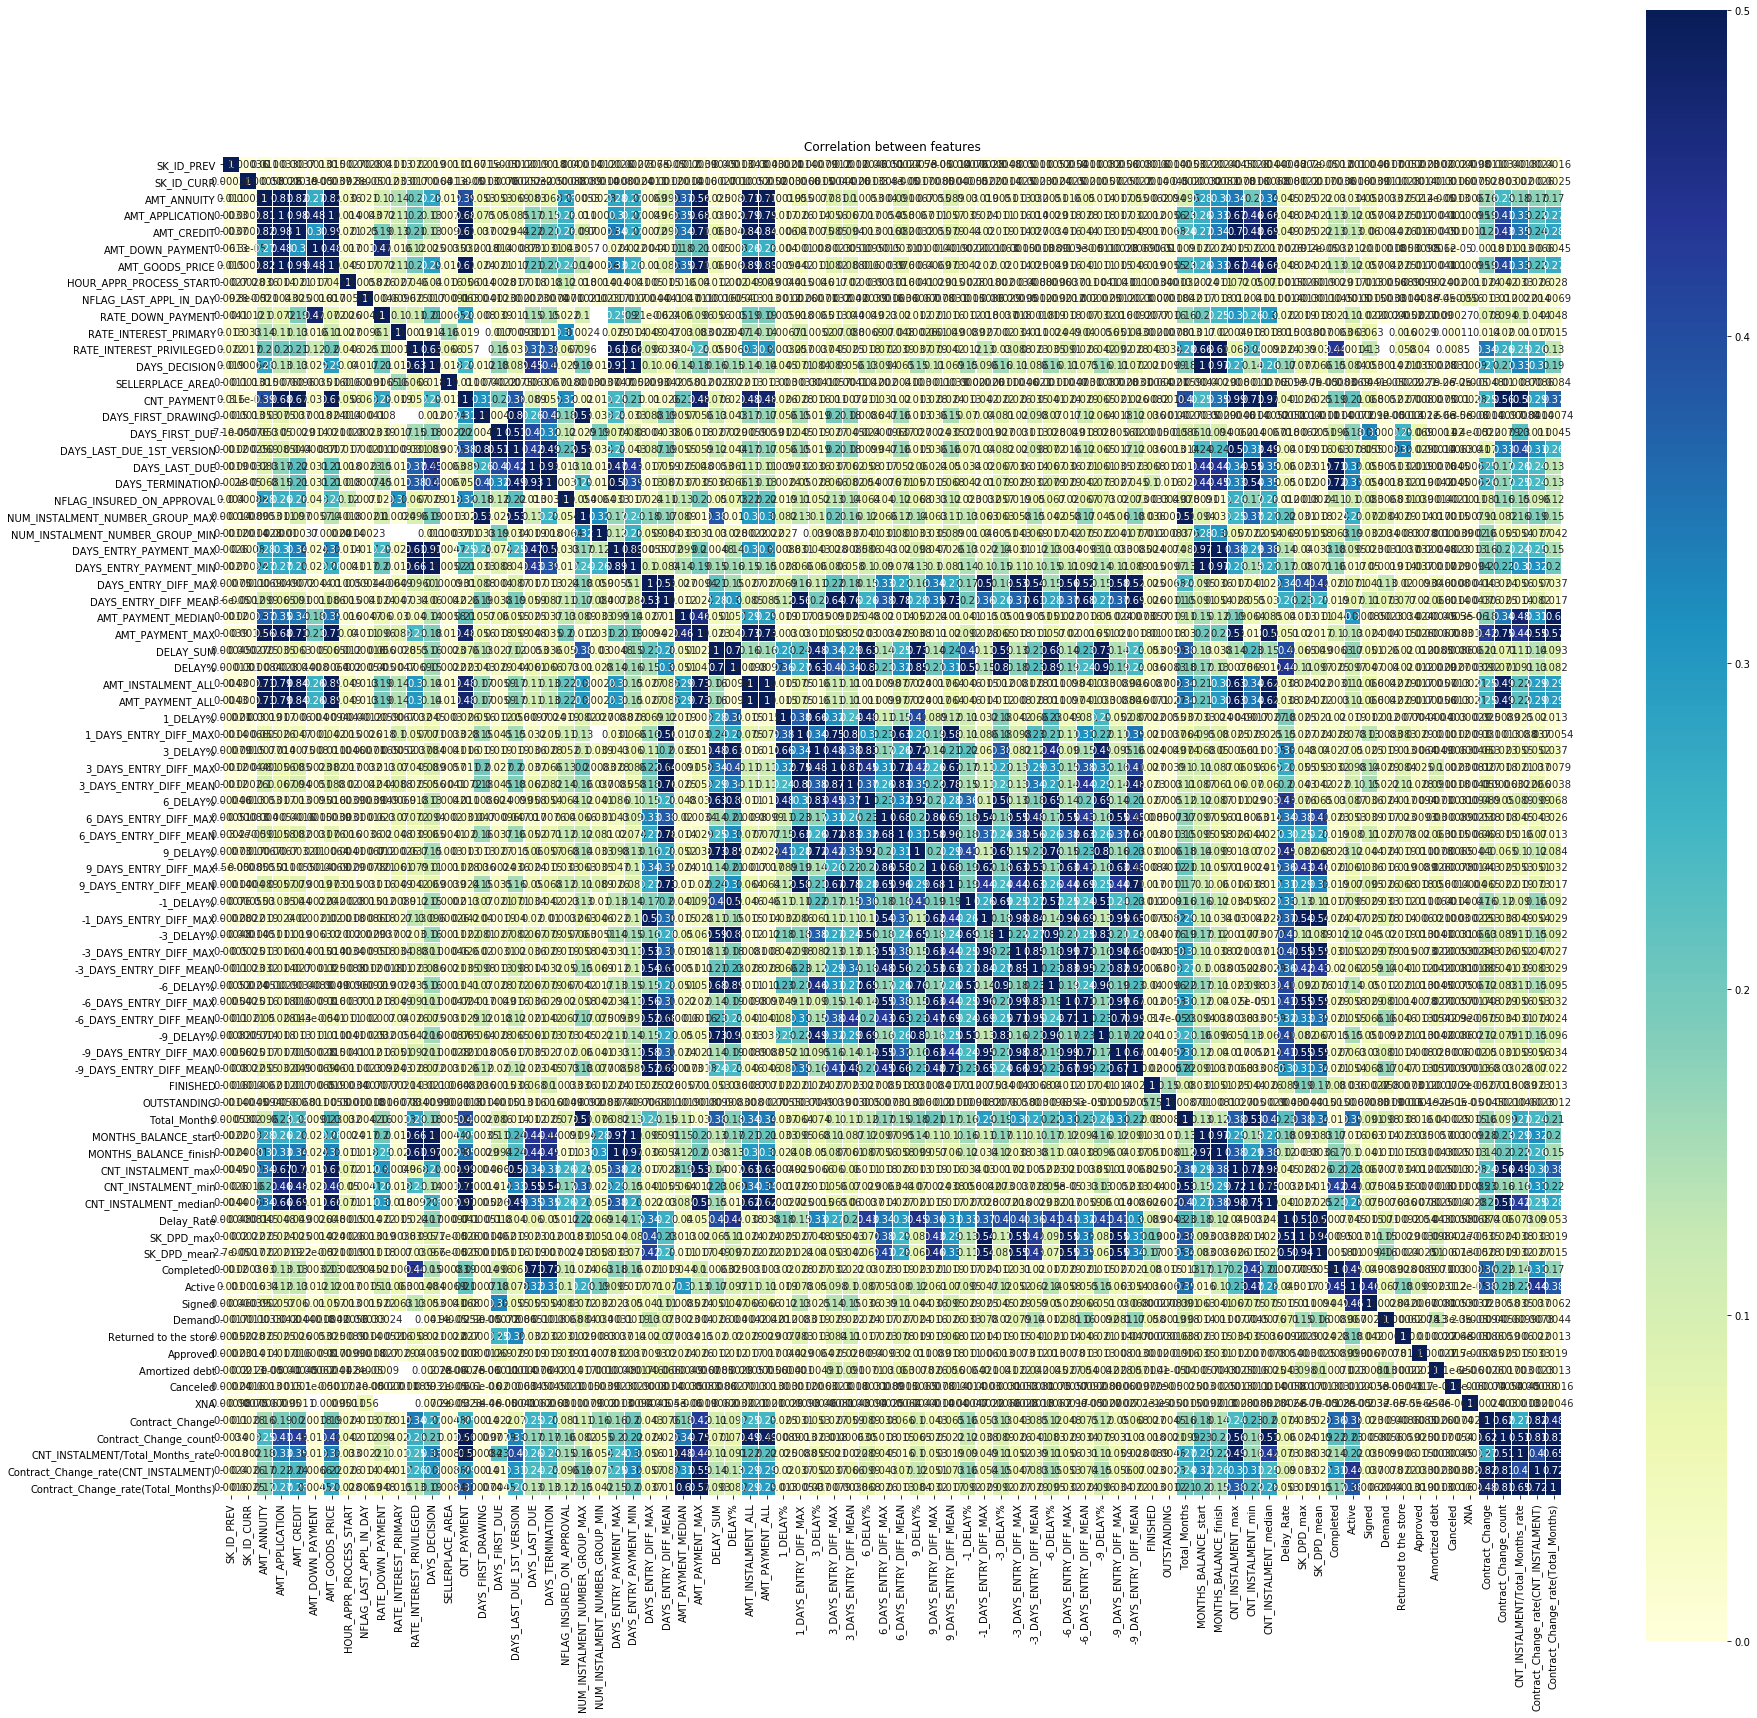

In [105]:
ext_data = result
correlations = ext_data.corr()
plt.figure(figsize=(30, 30))

sns.heatmap(np.abs(correlations), vmin=0, vmax=0.5, linewidths=0.05,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features')